In [1]:
from obspy.clients.fdsn.client import Client
from obspy import UTCDateTime as utc
import seaborn as sns
import SeisRoutine.catalog as src

In [2]:
client = Client("ETH")
t1 = utc("2015-01-01T00:00:00")
t2 = utc("2015-01-11T00:00:00")
cat = client.get_events(starttime=t1,
                        endtime=t2,
                        includearrivals=True)

In [3]:
import importlib
importlib.reload(src)

<module 'SeisRoutine.catalog' from 'c:\\Users\\ikahb\\OneDrive\\Applications\\GitHub\\SeisRoutine\\SeisRoutine\\catalog.py'>

In [4]:
insp = src.inspector(cat=cat)
print(insp)

Number of Phases: 469
Number of Attributes: 38


In [5]:
networks = insp.df_phases[['station', 'network']].drop_duplicates()
coords = {'station': [], 'latitude': [], 'longitude': []}
for index, net in networks.iterrows():
    try:
        inventory = client.get_stations(
            network=net.network, station=net.station,
            starttime=t1,
            endtime=t2)
        station = inventory[0][0]
        coords['station'].append(station.code)
        coords['latitude'].append(station.latitude)
        coords['longitude'].append(station.longitude)
    except Exception as error:
        # print(error)
        pass
import pandas as pd
coords = pd.DataFrame(coords)

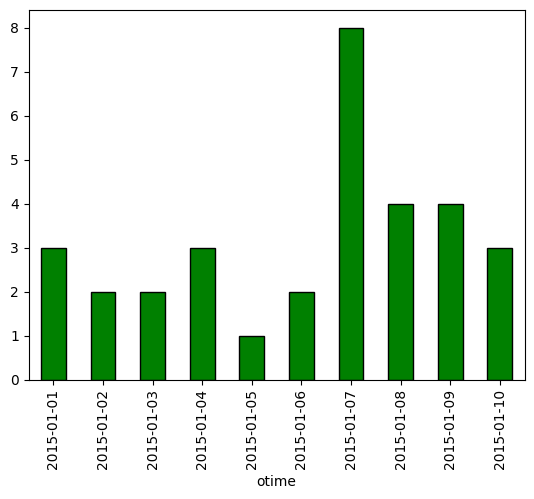

In [6]:
insp.plot_seismicity_events()

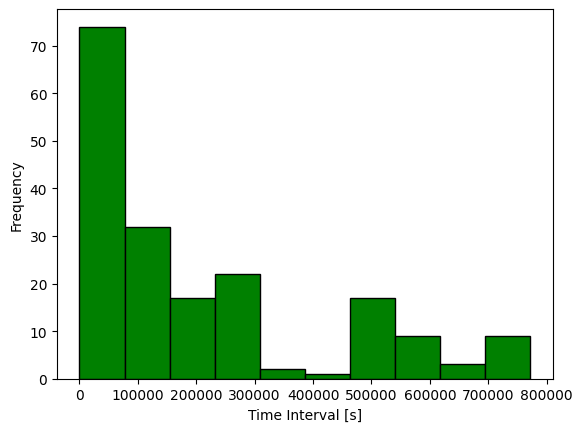

In [7]:
insp.plot_seismicity_phases()

In [8]:
# import importlib
# importlib.reload(sr.plot)

Saved figure to ./Fig/ResDist_density.png


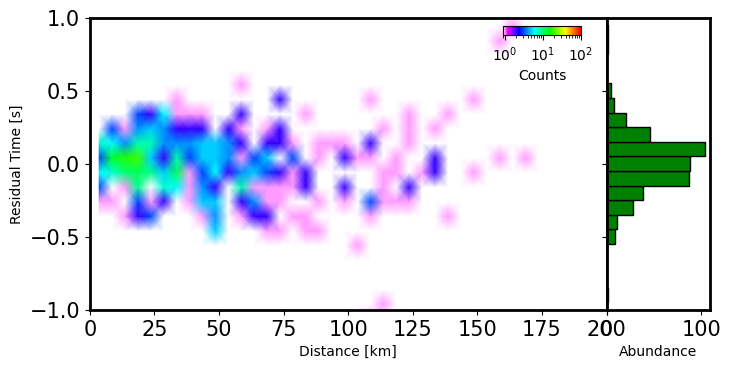

In [9]:
insp.plot_residual_vs_distance(
    kind='density',
    ystep=0.1, xstep=5, norm='log',
    histlog=False, xlim=[0, 200], ylim=[-1, 1], vmax=101, labelsize=15,
    figsize=(8, 4),
    save=True, savefile='./Fig/ResDist_density.png')

Saved figure to ./Fig/ResDist_scatter.png


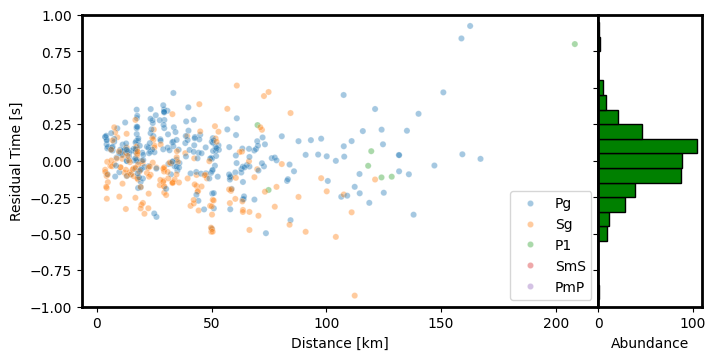

In [10]:
insp.plot_residual_vs_distance(
    kind='scatter', ystep=0.1, ylim=[-1, 1], histlog=False,
    figsize=(8, 4), save=True, savefile='./Fig/ResDist_scatter.png')

Saved figure to ./Fig/station_participation.png


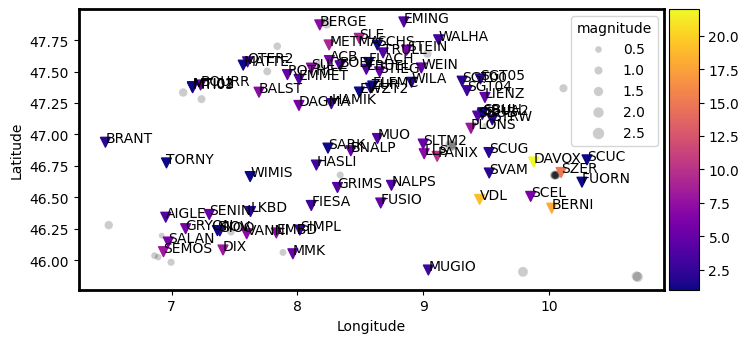

In [11]:
insp.plot_station_participation(
    coords,
    figsize=(8, 8), save=True, savefile='./Fig/station_participation.png')

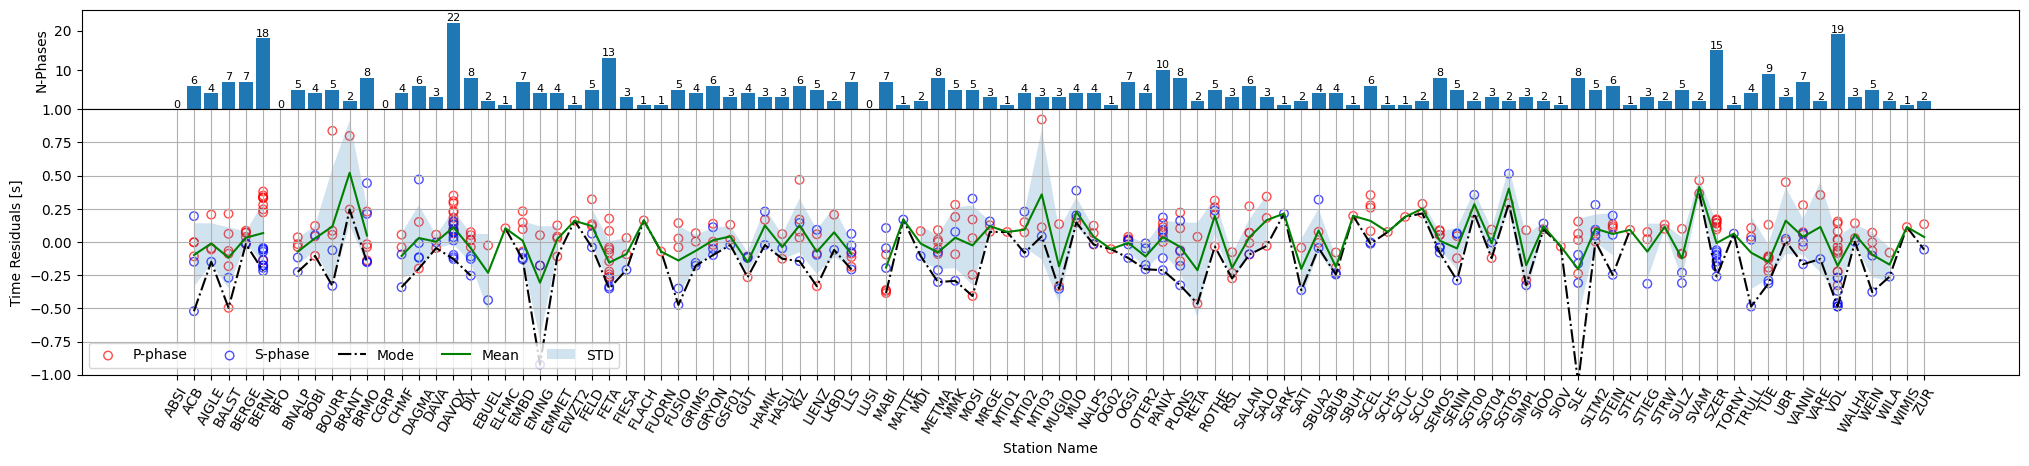

In [12]:
insp.plot_statistical_station_participation_and_time_residuals(figsize=(25, 5))

Number of calculated s-p: 168
Number of all phases: 469
Number of P-type phases: 284
Number of S-type phases: 185
Saved figure to ./Fig/SminusP.png


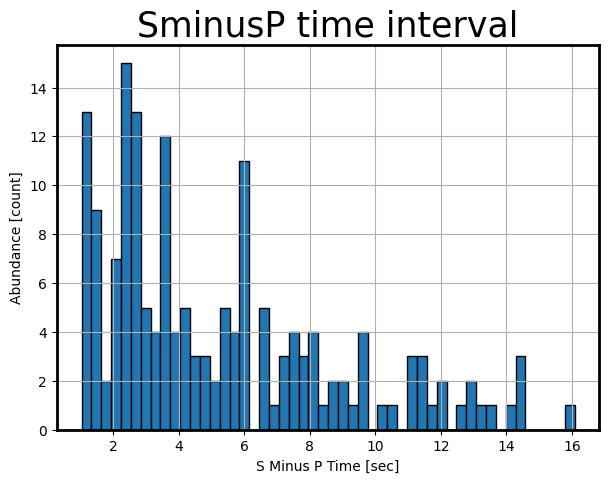

In [13]:
insp.plot_hist_SminusP(bins=50,
                       title='SminusP time interval',
                       figsize=(7, 5), save=True, savefile='./Fig/SminusP.png')

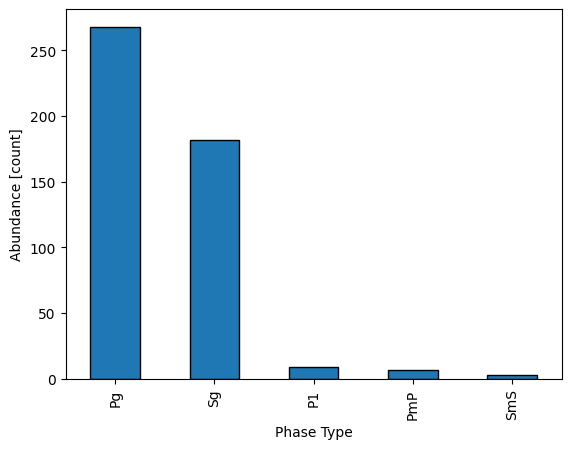

In [14]:
insp.plot_bar_phasetype()

Saved figure to ./Fig/TravelTime.png


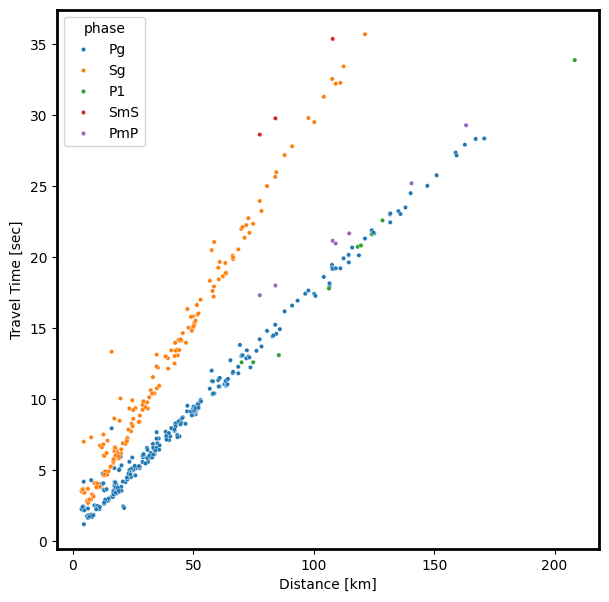

In [15]:
insp.plot_traveltime(
    figsize=(7, 7),
    save=True, savefile='./Fig/TravelTime.png')

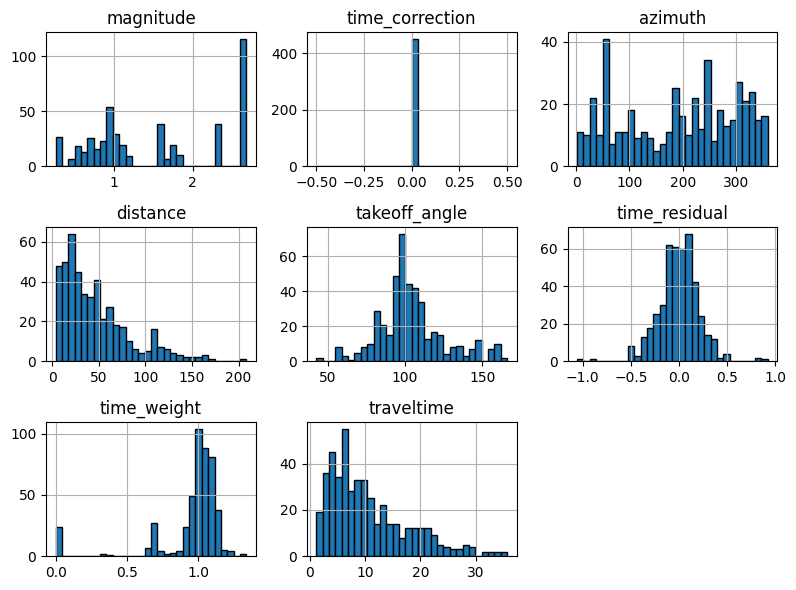

In [16]:
insp.plot_hist_of_numeric(figsize=(8, 6), bins=30, edgecolor='k')

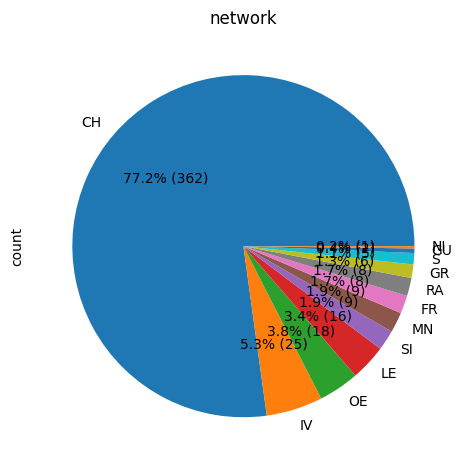

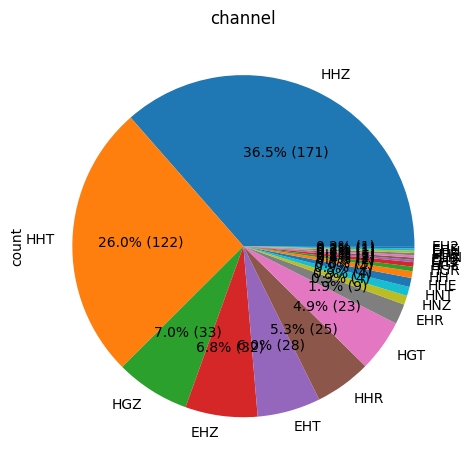

In [17]:
insp.plot_pie_of_none_numeric()

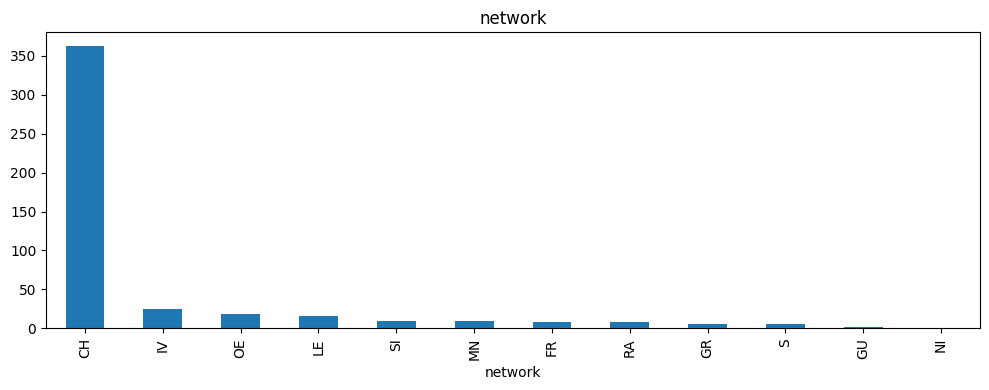

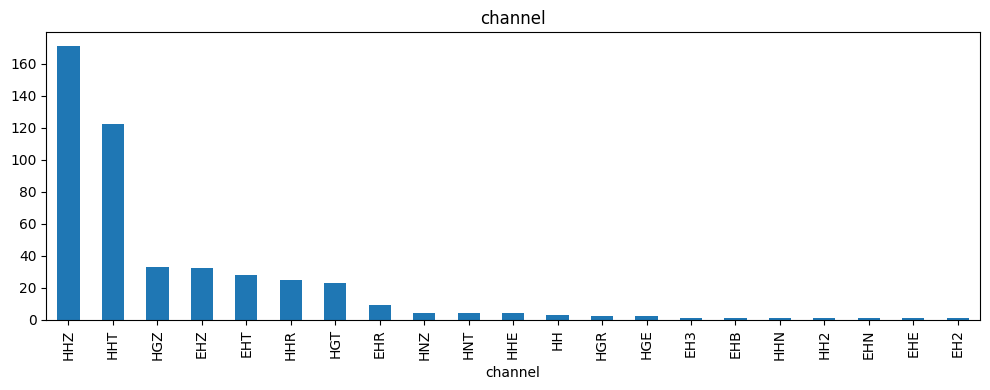

In [18]:
insp.plot_bar_of_none_numeric(figsize=(10, 4))

Saved figure to ./Fig/MagDist.png


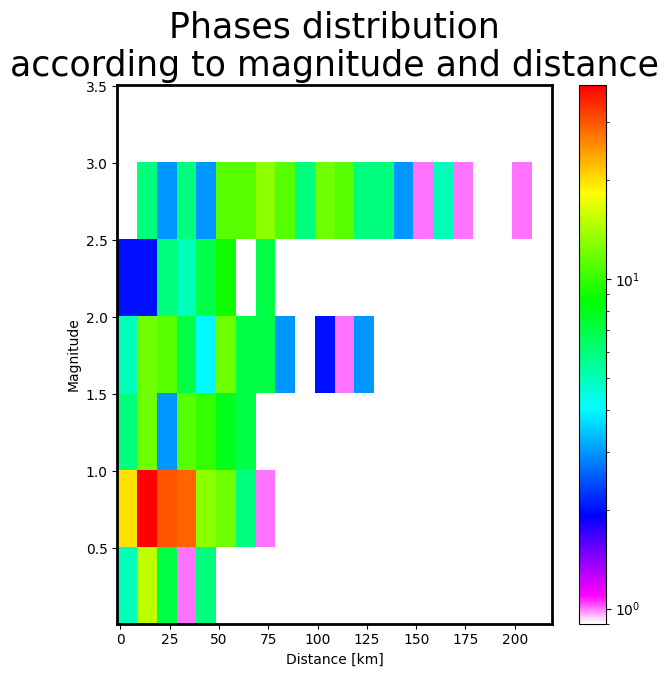

In [19]:
insp.plot_phase_mag_dist(figsize=(7, 7),
    save=True, savefile='./Fig/MagDist.png')

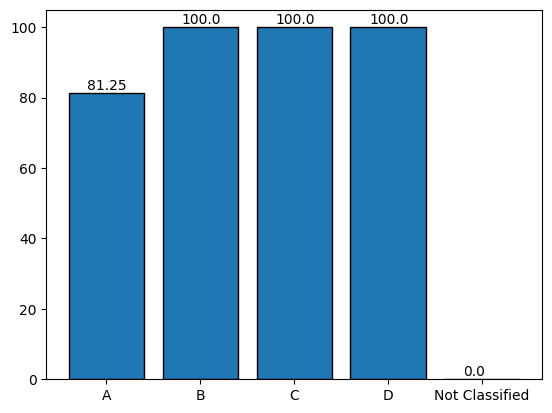

In [20]:
insp.quality_classification(citeria='Hypoellipse & NLLOC')
insp.plot_quality_classification()

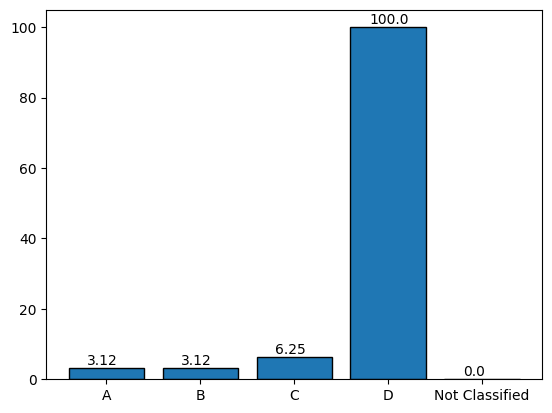

In [21]:
citeria = {
    1: {"stations": [50, 999], "gap": [0, 270], "rms": [0, 0.5], "errorH": [0, 3.0], "errorZ": [0, 3.0], 'evaluation': 'manual', 'label': 'A'},
    2: {"stations": [30, 999], "gap": [0, 270], "rms": [0, 0.5], "errorH": [0, 5.0], "errorZ": [0, 5.0], 'evaluation': 'manual', 'label': 'B'},
    3: {"stations": [20, 999], "gap": [0, 360], "rms": [0, 0.5], "errorH": [0, 5.0], "errorZ": [0, 5.0], 'evaluation': 'manual', 'label': 'C'},
    4: {"stations": [3, 999], "gap": [0, 360], "rms": [0, 9.9], "errorH": [0, 999], "errorZ": [0, 999], 'evaluation': 'manual', 'label': 'D'},
}
insp.quality_classification(citeria=citeria)
insp.plot_quality_classification()